**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

Library yang digunakan yaitu: pandas digunakan untuk manipulasi dan analisis data, numpy menyediakan fungsi-fungsi matematika dan array multidimensi sering digunakan dalam analisis numerik, matplotlib digunakan untuk visualisasi data dalam bentuk grafik dan plot, seaborn digunakan untuk visualisai data statistik berfungsi membuat plot yang lebih menarik dan informatif, math untuk menyediakan fungsi-fungsi matematika dasar, datetime digunakan untuk objek tanggal dan waktu.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Mengimport dataset yang akan di analisis, datasets yang digunakan yaitu yahoo stock price didapatkan dari kaggle

Dataset source : https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price

In [3]:
#https://drive.google.com/file/d/1qzITCqfYh5YjBUhiGiITCJXbQlyDnbh6/view?usp=sharing

!gdown 1qzITCqfYh5YjBUhiGiITCJXbQlyDnbh6

Downloading...
From: https://drive.google.com/uc?id=1qzITCqfYh5YjBUhiGiITCJXbQlyDnbh6
To: /content/yahoo_stock.csv
100% 198k/198k [00:00<00:00, 119MB/s]


In [4]:
train_data = pd.read_csv('yahoo_stock.csv')
train_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


setelah mengimport datasets selanjutnya membaca dan menyimpan datasets yang telah di import kedalam DataFrame yang disebut dengan "Train Data", untuk membaca datasets tersebut ditampilkan beberapa baris pertama dari dataframe tersebut dengan menggunakan 'train_data.head', dari datasets yang ditampilkan dapat diketahui datasets tersebut terdiri dari Date, High, Low, Open, Close, Volume dan Adj Close

Check missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


setelah menampilkan datasets yang digunakan, kemudian datasets tersebut di check apakah terdapat missing value atau tidak, yaitu dengan menampilkan info dari datasets teresbut, dari datasets yang ditampilkan diatas dapat diketahui bahwa panjang datanya sama yang berarti tidak terdapat missing value.

Check statistic vales for every features

salanjutnya mengecek statistical features yaitu jumlah, mean, standar deviasi, min, dan max.

In [6]:
train_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


Handle datetime data for time series

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


Kode diatas digunakan untuk mengubah kolom Date dalam DataFrame 'train_data' menjadi tipe data datetime, mengatur kolom 'Date' sebagai indeks DataFrame agar tidak termasuk kedalam fitur utama, dan kemudian menampilkan beberapa baris pertama dari DataFrame yang sudah diubah.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

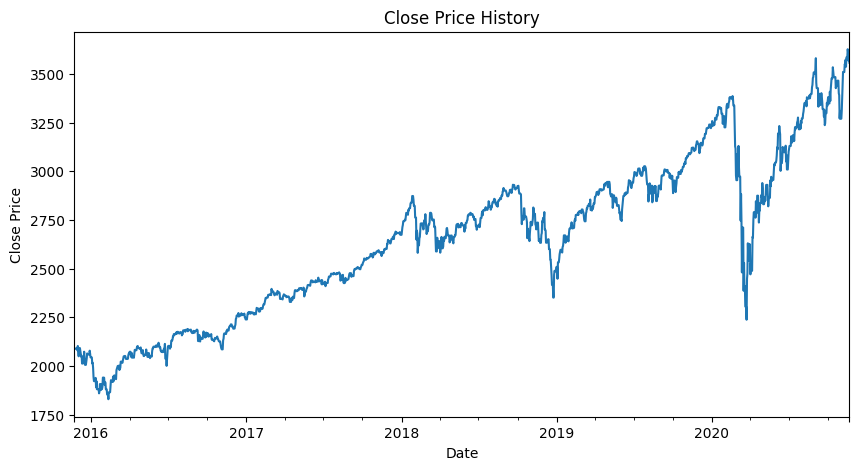

In [8]:
plt.figure(figsize=(10, 5)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Close Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Close Price') # y label
plt.show()

kodingan diatas digunakan untuk membuat sebuah gambar dengan memplot 'Adj Close', dengan judul pada plot yaitu 'Close Price History' dengan label Date sebagai sumbu X dan Label Close Price sebagai sumbu Y, dan kemudian plot akan ditampilkan. dari plot yang ditampilkan tersebut dapat diketahui bahwa dalam waktu lima tahun dari 2016-2020 harga saham mengalami kenaikan, akan tetapi pada tahun 2019 terjadi penurunan yang cukup tinggi kemudian harga saham mengalami kenaikan dan pada tahun 2020 terjadi penurunan kembali yang cukup tinggi dan kembali mengalami kenaikan diakhir tahun 2020.

<Figure size 1000x500 with 0 Axes>

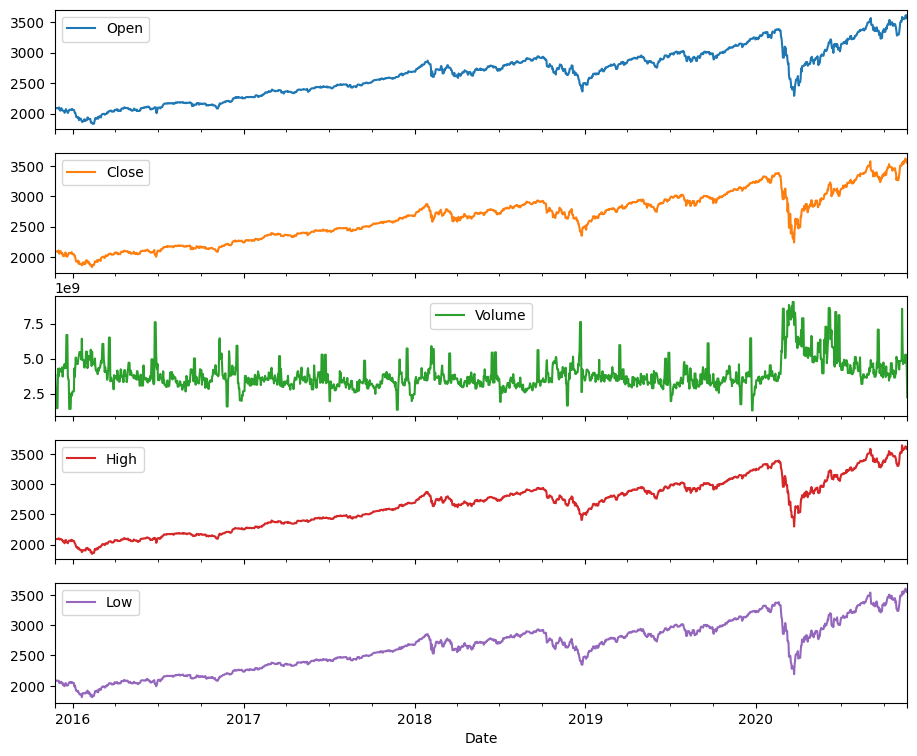

In [29]:
plt.figure(figsize=(10, 5)) # resizing the plot
cols = ['Open', 'Close', 'Volume',	'High',	'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Mengecek fitur-fitur yang lainnya seperti open, close, high dan Low, dari hasil diatas dapat diketahui bahwa hasil yang ditampilkan memiliki kesamaan dimana tren harga saham tersebut cenderung mengalami kenaikan, kecuali pada volume karena volume ini berisi mengenai transaksi yang dilakukan dan kemungkinan yang ikut bertransaksi disini trennya naik turun.

In [11]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Kode diatas digunakan untuk menambahkan dua kolom baru kedalam DataFrame 'Train Data' yaitu 'HL_PCT' dan 'PCT_Change' yang menggambarkan perubahan harga tertinggi dan terendah serta presentase perubahan harga penutupan dan harga pembukaan yang dihitung berdasarkan kolom 'High', 'Low', 'Close', dan 'Open' pada DataFrame.

In [12]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Kode di atas digunakan untuk menggambarkan pembuatan DataFrame baru yang disimpan dalam variabel df. DataFrame baru ini merupakan subset dari DataFrame train_data yang hanya terdiri dari empat kolom, yaitu 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume'.

In [13]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

92


<ipython-input-13-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


kode diatas digunakan untuk mendapatkan 'forcest out', yaitu jumlah baris yang akan digunakan untuk peramalan, dengan label yang bersisi nilai-nilai dari 'Adj Close'.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Model diatas digunakan untuk mengimport beberapa fungsi di sklearn yang digunakan untuk pemrosesan data, pemodelan, dan evaluasi dalam tugas regresi. Model tersebut memiliki fungsinya masing-masing yaitu sklearn.preprocessing import StandardScaler berfungsi untuk melakukan penskalaan fitur pada data, sklearn.linear_model import LinearRegression, Ridge berfungsi untuk membangun model regresi linear, sklearn.ensemble import RandomForestRegressor berfungsi untuk membangun model regresi dengan menggunakan metode ensemble berbasis pohon, yaitu Random Forest, sklearn.svm import SVR berfungsi untuk membangun model regresi dengan menggunakan Support Vector Regression (SVR), sklearn.model_selection import train_test_split berfungsi untuk membagi dataset menjadi subset pelatihan dan subset pengujian, dan sklearn.metrics import mean_squared_log_error berfungsi untuk mengukur perbedaan antara logaritma nilai sebenarnya dan logaritma nilai yang diprediksi.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [15]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-15-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Kode diatas digunakan untuk melakukan normalisasi data, hal tersebut dilakukan karena data yang digunakan memiliki ukuran yang berbeda-beda dan memiliki interval yang cukup jauh, oleh karena itu dilakukan normalisasi data agar range harganya tidak terlalu jauh, sehingga saat dimasukan kedalam machine learning model akan lebih cepat dan juga mengurangi terjadinya bias.

**Slicing**

In [16]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [17]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-17-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Dua kode diatas digunakan untuk melakukan slycing yaitu menentukan nilai X dan Y. Dimana X sebagai data fitur yang telah diproses dan Y sebagai data target. X akan digunakan untuk melatih model, sedangkan y akan digunakan sebagai label yang sesuai dengan setiap data dalam X.

**Spliting**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dengan menggunaka kode diatas kita membagi data menjadi set pelatihan dan set pengujian. kita dapat menggunakan set pelatihan (X_train dan y_train) untuk melatih model, dan set pengujian (X_test dan y_test) untuk menguji performa model yang telah dilatih. Pembagian data ini penting untuk menguji sejauh mana model dapat melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Uji coba dilakukan dengan dua model yaitu Linear Regresion dan Random Forest.

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Uji coba dengan linear regression menggunakan set pelatihan (X_train dan y_train) dan menguji performanya menggunakan set pengujian (X_test dan y_test). Hasil performa model dievaluasi dengan menggunakan koefisien determinasi (R-squared) yang dapat digunakan untuk memahami sejauh mana model dapat menjelaskan variasi dalam set pengujian. Semakin tinggi nilai lr_confidence, semakin baik performa model regresi linear tersebut.

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Uji coba dengan Random Forest yaitu dengan melatih model regresi acak menggunakan set pelatihan (X_train dan y_train) dan menguji performanya menggunakan set pengujian (X_test dan y_test). Hasil performa model dievaluasi dengan menggunakan koefisien determinasi (R-squared) yang dapat digunakan untuk memahami sejauh mana model dapat menjelaskan variasi dalam data pengujian. Semakin tinggi nilai rf_confidence, semakin baik performa model regresi acak tersebut.

In [21]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Kode diatas digunakan untuk memprediksi atau melakukan peramalan  berdasarkan model Regresi acak yang telah dilatih sebelumnya, Hasil prediksi disimpan dalam kolom 'Forecast' di DataFrame 'df'. Setiap prediksi ditempatkan pada baris yang sesuai dengan tanggal yang dihitung dengan menambahkan waktu dalam detik ke 'last_unix' pada setiap iterasi loop.

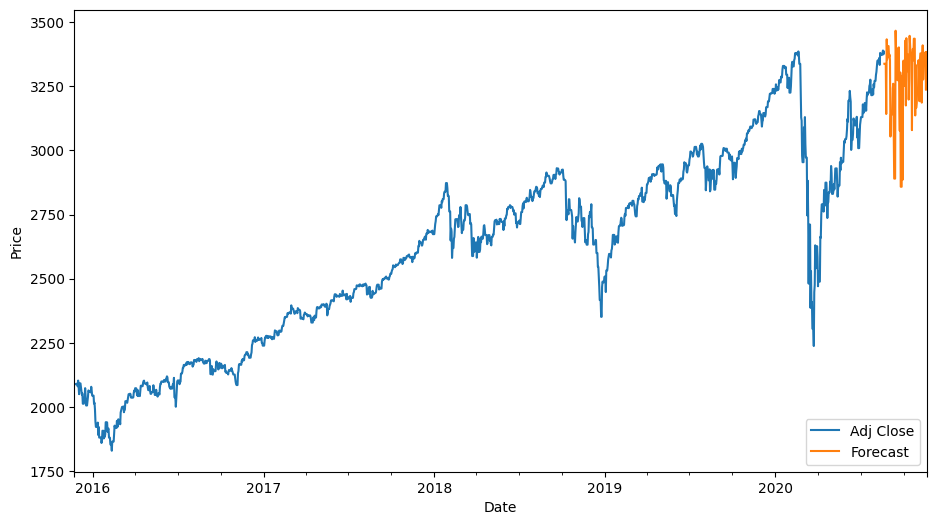

In [24]:
plt.figure(figsize=(11, 6))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Kode diatas digunakan untuk menampilkan gambar dengan memplot kolom 'Adj Close' (Harga penutupan) dan 'forcest' (Prediksi harga) dari DataFrame 'df'. kode tersebut menghasilkan plot yang menunjukkan perbandingan antara harga penutupan aktual ('Adj Close') dengan prediksi harga ('Forecast') dalam DataFrame df. Dari data yang ditampilkan menunjukan bahwa prediksi harga saham untuk beberapa bulan kedepan memiliki kondisi yang masih stabil yang digambarkan dengan warna orange.